PROBLEMA 1: INTEGRACIÓN NUMÉRICA

LITERAL a)
------------------------------------------------------------

La función f(x)=|x|e^x es continua y monótona creciente en los intervalos [-1,0] y [0,1].
Al dividir el intervalo respetando estos subintervalos, las sumas de Riemann superiores
e inferiores convergen al mismo valor cuando el número de nodos aumenta.
Por lo tanto, la elección entre suma superior o inferior no afecta el valor límite
de la aproximación de la integral, sino únicamente el signo del error.


LITERAL b)
------------------------------------------------------------
Valor exacto  = 1.2642411177
Riemann       = 1.3846242613
Punto Medio   = 1.2628098975
Trapecio      = 1.2671041419
Simpson       = 1.2642442286

LITERAL c)
------------------------------------------------------------
Gráfica: evolución del valor numérico de la integral vs número de nodos


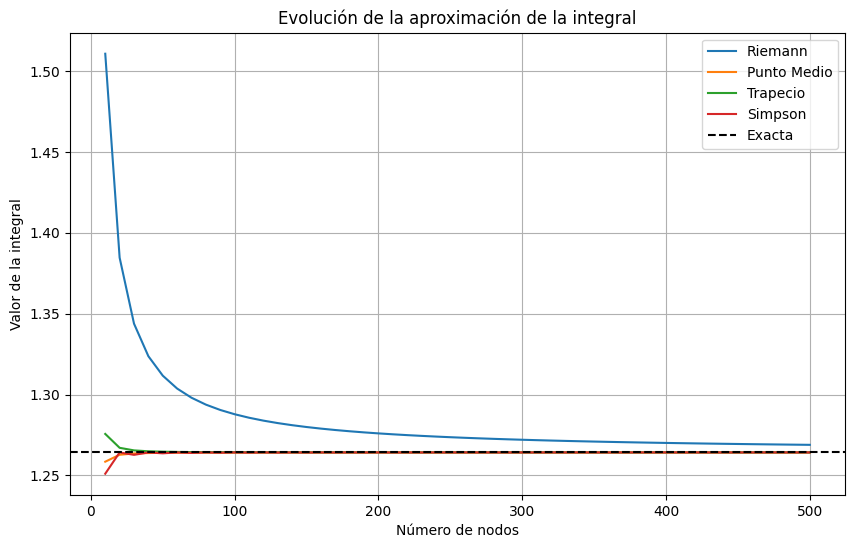


Número mínimo de nodos para alcanzar 7 cifras decimales
------------------------------------------------------------
Riemann     : no alcanza la precisión
Punto Medio : n = 3386  | error = 5.00e-08
Trapecio    : n = 4788  | error = 5.00e-08
Simpson     : n =   60  | error = 3.85e-08

PROBLEMA 2: MÉTODO DE HEUN


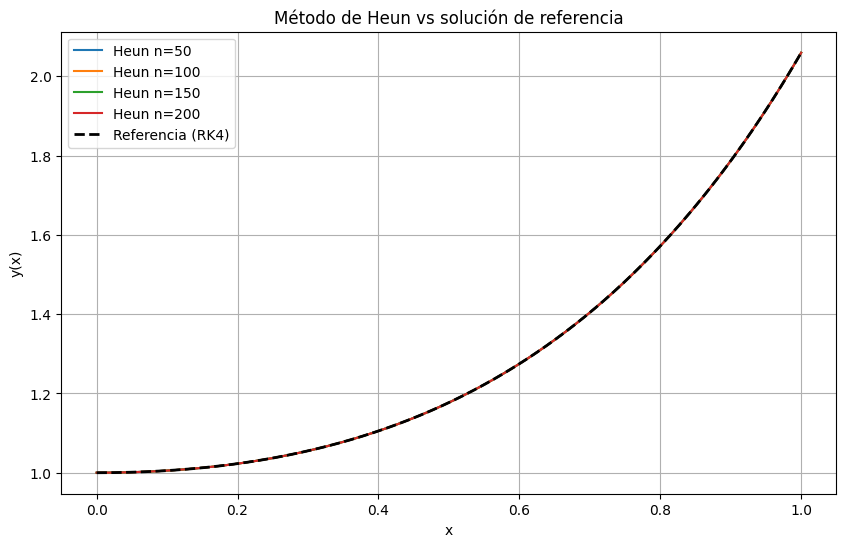

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ======================================================
# PROBLEMA 1: INTEGRACIÓN NUMÉRICA
# ======================================================

print("="*60)
print("PROBLEMA 1: INTEGRACIÓN NUMÉRICA")
print("="*60)

# ------------------------------------------------------
# Función e integral exacta
# ------------------------------------------------------
def f(x):
    return np.abs(x) * np.exp(x)

def integral_exacta():
    return 2 - 2/np.exp(1)

I_exacta = integral_exacta()

# ======================================================
# LITERAL a)
# ======================================================
print("\nLITERAL a)")
print("-"*60)
print("""
La función f(x)=|x|e^x es continua y monótona creciente en los intervalos [-1,0] y [0,1].
Al dividir el intervalo respetando estos subintervalos, las sumas de Riemann superiores
e inferiores convergen al mismo valor cuando el número de nodos aumenta.
Por lo tanto, la elección entre suma superior o inferior no afecta el valor límite
de la aproximación de la integral, sino únicamente el signo del error.
""")

def riemann(a, b, n, superior=True):
    h = (b - a) / n
    suma = 0.0
    for i in range(n):
        x = a + (i + 1)*h if superior else a + i*h
        suma += f(x)
    return suma * h

# ======================================================
# LITERAL b)
# ======================================================
print("\nLITERAL b)")
print("-"*60)

def punto_medio(a, b, n):
    h = (b - a) / n
    return sum(f(a + (i + 0.5)*h) for i in range(n)) * h

def trapecio(a, b, n):
    h = (b - a) / n
    return h*(0.5*f(a) + sum(f(a+i*h) for i in range(1,n)) + 0.5*f(b))

def simpson(a, b, n):
    if n % 2 != 0:
        n += 1
    h = (b - a) / n
    suma = f(a) + f(b)
    for i in range(1, n):
        suma += 4*f(a+i*h) if i % 2 != 0 else 2*f(a+i*h)
    return suma * h / 3

n_test = 20
print(f"Valor exacto  = {I_exacta:.10f}")
print(f"Riemann       = {riemann(-1,1,n_test):.10f}")
print(f"Punto Medio   = {punto_medio(-1,1,n_test):.10f}")
print(f"Trapecio      = {trapecio(-1,1,n_test):.10f}")
print(f"Simpson       = {simpson(-1,1,n_test):.10f}")

# ======================================================
# LITERAL c)
# ======================================================
print("\nLITERAL c)")
print("-"*60)
print("Gráfica: evolución del valor numérico de la integral vs número de nodos")

nodos = np.arange(10, 501, 10)
val_riemann, val_pm, val_trap, val_simp = [], [], [], []

for n in nodos:
    val_riemann.append(riemann(-1,1,n))
    val_pm.append(punto_medio(-1,1,n))
    val_trap.append(trapecio(-1,1,n))
    val_simp.append(simpson(-1,1,n))

plt.figure(figsize=(10,6))
plt.plot(nodos, val_riemann, label="Riemann")
plt.plot(nodos, val_pm, label="Punto Medio")
plt.plot(nodos, val_trap, label="Trapecio")
plt.plot(nodos, val_simp, label="Simpson")
plt.axhline(I_exacta, linestyle="--", color="black", label="Exacta")
plt.xlabel("Número de nodos")
plt.ylabel("Valor de la integral")
plt.title("Evolución de la aproximación de la integral")
plt.legend()
plt.grid()
plt.show()

# ------------------------------------------------------
# Precisión: 7 cifras decimales
# ------------------------------------------------------
print("\nNúmero mínimo de nodos para alcanzar 7 cifras decimales")
print("-"*60)

tol = 5e-8
max_n = 5000

def buscar_nodos(metodo, nombre):
    for n in range(2, max_n, 2):
        if nombre == "Simpson" and n % 2 != 0:
            continue
        error = abs(metodo(-1,1,n) - I_exacta)
        if error < tol:
            print(f"{nombre:12s}: n = {n:4d}  | error = {error:.2e}")
            return
    print(f"{nombre:12s}: no alcanza la precisión")

buscar_nodos(riemann, "Riemann")
buscar_nodos(punto_medio, "Punto Medio")
buscar_nodos(trapecio, "Trapecio")
buscar_nodos(simpson, "Simpson")

# ======================================================
# PROBLEMA 2: MÉTODO DE HEUN
# ======================================================
print("\n" + "="*60)
print("PROBLEMA 2: MÉTODO DE HEUN")
print("="*60)

def f_edo(x, y):
    return x*y + x**2

def heun(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = 1.0
    for i in range(n):
        k1 = f_edo(x[i], y[i])
        k2 = f_edo(x[i]+h, y[i]+h*k1)
        y[i+1] = y[i] + h*(k1+k2)/2
    return x, y

def rk4(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = np.zeros(n+1)
    y[0] = 1.0
    for i in range(n):
        k1 = f_edo(x[i], y[i])
        k2 = f_edo(x[i]+h/2, y[i]+h*k1/2)
        k3 = f_edo(x[i]+h/2, y[i]+h*k2/2)
        k4 = f_edo(x[i]+h, y[i]+h*k3)
        y[i+1] = y[i] + h*(k1+2*k2+2*k3+k4)/6
    return x, y

plt.figure(figsize=(10,6))
for n in [50, 100, 150, 200]:
    x, y = heun(0,1,n)
    plt.plot(x, y, label=f"Heun n={n}")

x_ref, y_ref = rk4(0,1,5000)
plt.plot(x_ref, y_ref, 'k--', linewidth=2, label="Referencia (RK4)")

plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Método de Heun vs solución de referencia")
plt.legend()
plt.grid()
plt.show()
